# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('demo01_tratada.csv')

print("Tipos de dados:")
print(df.dtypes)

print("\nValores faltantes:")
print(df.isnull().sum().sum())

y = df['mau']
X = df.drop(columns=['mau'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'\nX_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')


Tipos de dados:
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary spe

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

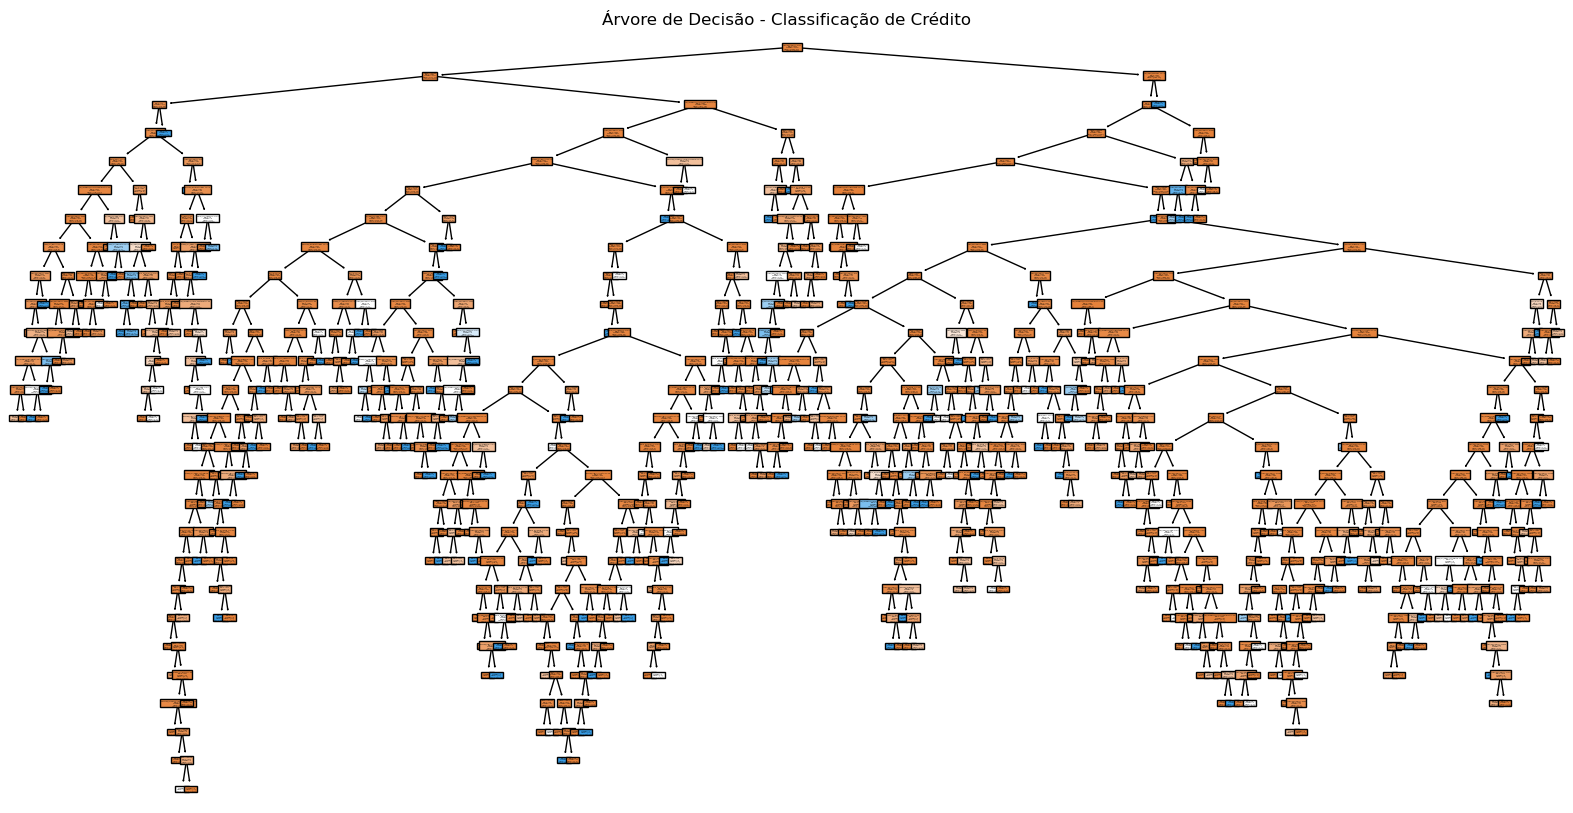

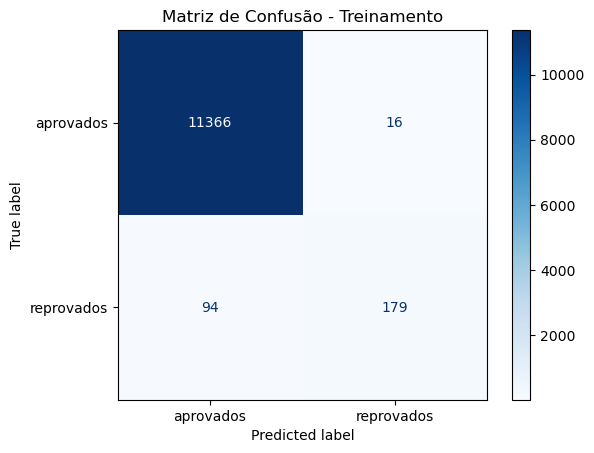

Acurácia na base de treinamento: 99.06%


In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

modelo_arvore = DecisionTreeClassifier(random_state=42)

modelo_arvore.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X_train.columns, class_names=["aprovado", "reprovado"])
plt.title("Árvore de Decisão - Classificação de Crédito")
plt.show()

y_pred_train = modelo_arvore.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Treinamento")
plt.show()

acuracia_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {acuracia_train:.2%}")


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

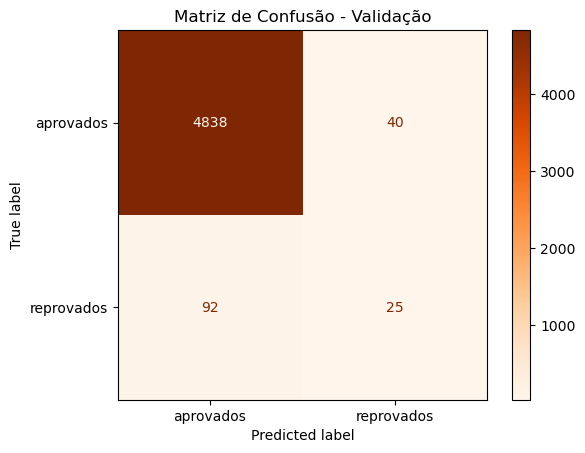

Acurácia na base de teste: 97.36%
Acurácia na base de treino: 99.06%


In [3]:
y_pred_test = modelo_arvore.predict(X_val)

cm_test = confusion_matrix(y_val, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["aprovados", "reprovados"])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusão - Validação")
plt.show()

acuracia_test = accuracy_score(y_val, y_pred_test)
print(f"Acurácia na base de teste: {acuracia_test:.2%}")
print(f"Acurácia na base de treino: {acuracia_train:.2%}")


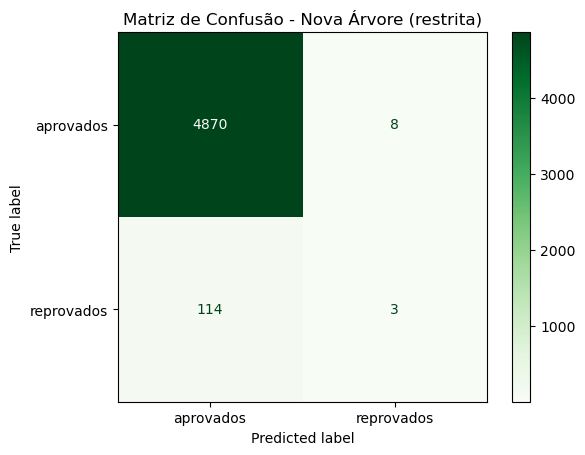

Proporção de 'maus' preditos na base de teste: 0.22%
Acurácia com árvore restrita: 97.56%


In [4]:
modelo_restrito = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_restrito.fit(X_train, y_train)

y_pred_test_restrito = modelo_restrito.predict(X_val)

cm_restrito = confusion_matrix(y_val, y_pred_test_restrito)
disp_restrito = ConfusionMatrixDisplay(confusion_matrix=cm_restrito, display_labels=["aprovados", "reprovados"])
disp_restrito.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusão - Nova Árvore (restrita)")
plt.show()

import numpy as np
proporcao_maus = np.mean(y_pred_test_restrito)
print(f"Proporção de 'maus' preditos na base de teste: {proporcao_maus:.2%}")

acuracia_restrita = accuracy_score(y_val, y_pred_test_restrito)
print(f"Acurácia com árvore restrita: {acuracia_restrita:.2%}")


In [5]:
y_pred_todos_bons = np.zeros_like(y_val)

acuracia_bons = accuracy_score(y_val, y_pred_todos_bons)
print(f"Acurácia se todos forem classificados como 'bons': {acuracia_bons:.2%}")


Acurácia se todos forem classificados como 'bons': 97.66%
